# Evaluation & Visualization (Hybrid split)

## Import Library

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score
)

## 데이터 및 예측 결과 불러오기

In [21]:
df_1 = pd.read_csv('../data/hybrid-split/pred-results/test_result_1_files.csv')
df_3 = pd.read_csv('../data/hybrid-split/pred-results/test_result_3_files.csv')
df_8 = pd.read_csv('../data/hybrid-split/pred-results/test_result_8_files.csv')

results = {
    '1 file': df_1,
    '3 files': df_3,
    '8 files': df_8
}

## Accuracy & Classification Report

In [22]:
metrics_summary = []
for label, df in results.items():
    y_true = df['Label_binary']
    y_pred = df['y_pred']
    y_prob = df['y_prob']
    
    acc = accuracy_score(y_true, y_pred)
    metrics_summary.append({'model': label, 'accuracy': acc})

    print(f"\n=== {label} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['BENIGN', 'MALICIOUS']))


=== 1 file ===
Accuracy: 0.7881
Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.77      1.00      0.87    145497
   MALICIOUS       1.00      0.23      0.37     55289

    accuracy                           0.79    200786
   macro avg       0.89      0.62      0.62    200786
weighted avg       0.84      0.79      0.74    200786


=== 3 files ===
Accuracy: 0.9109
Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.89      1.00      0.94    145497
   MALICIOUS       0.99      0.68      0.81     55289

    accuracy                           0.91    200786
   macro avg       0.94      0.84      0.88    200786
weighted avg       0.92      0.91      0.91    200786


=== 8 files ===
Accuracy: 0.9997
Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    145497
   MALICIOUS       1.00      1.00      1.00     55289

    accuracy

## Confusion Matrix 시각화

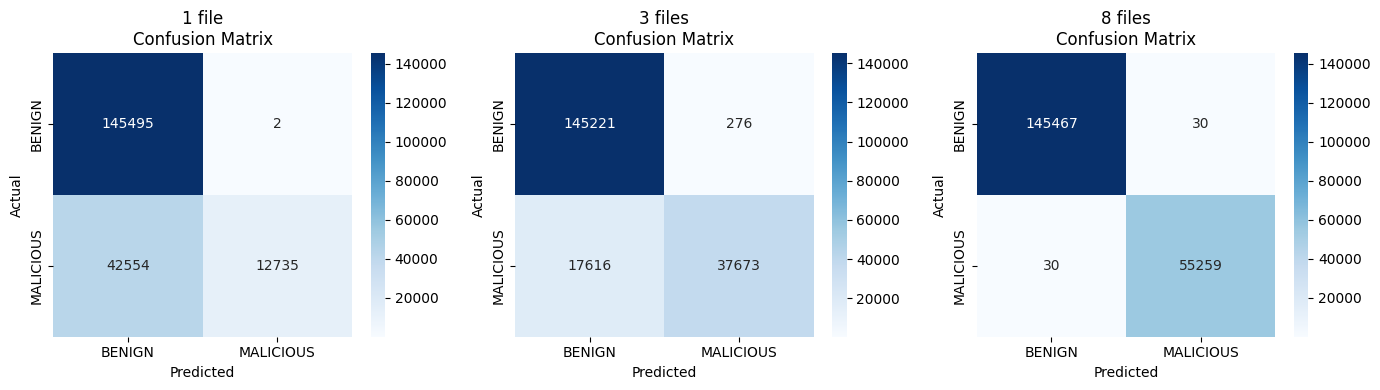

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, (label, df) in zip(axes, results.items()):
    y_true = df['Label_binary']
    y_pred = df['y_pred']
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['BENIGN', 'MALICIOUS'], yticklabels=['BENIGN', 'MALICIOUS'])
    ax.set_title(f'{label}\nConfusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

## ROC Curve (Receiver Operating Characteristic Curve)

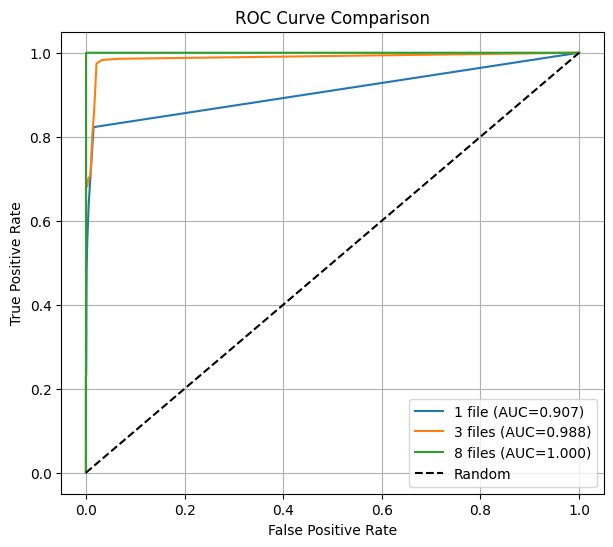

In [24]:
plt.figure(figsize=(7, 6))
for label, df in results.items():
    y_true = df['Label_binary']
    y_prob = df['y_prob']
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC={roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

## PR Curve (Precision-Recall Curve)

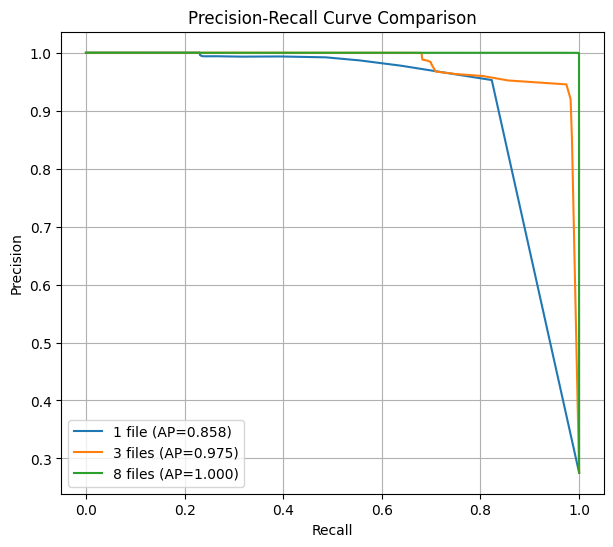

In [25]:
plt.figure(figsize=(7, 6))
for label, df in results.items():
    y_true = df['Label_binary']
    y_prob = df['y_prob']
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    ap = average_precision_score(y_true, y_prob)
    plt.plot(recall, precision, label=f'{label} (AP={ap:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()